# Ford GoBike System Data
## by (Rabab Hesham)

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during February 2019. Data contains information about the trips' duration, start and end stations.
It doesn't contain any personal information about the users, but it contains the user's gender and member type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from matplotlib import rcParams

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
87692,1028,2019-02-16 23:26:35.2410,2019-02-16 23:43:43.6250,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,145.0,29th St at Church St,37.743684,-122.426806,5951,Subscriber,1998.0,Male,No
128191,673,2019-02-10 13:46:35.4550,2019-02-10 13:57:48.7800,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5209,Subscriber,1995.0,Female,Yes
69202,655,2019-02-19 19:56:04.6230,2019-02-19 20:07:00.2070,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,124.0,19th St at Florida St,37.760447,-122.410807,5841,Subscriber,1985.0,Male,No
154871,829,2019-02-06 09:11:23.4030,2019-02-06 09:25:13.0320,101.0,15th St at Potrero Ave,37.767079,-122.407359,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,4601,Subscriber,1990.0,Male,No
39132,161,2019-02-23 10:20:13.2630,2019-02-23 10:22:54.7040,126.0,Esprit Park,37.761634,-122.390648,104.0,4th St at 16th St,37.767045,-122.390833,1564,Subscriber,1990.0,Male,No
5114,324,2019-02-28 14:02:24.7600,2019-02-28 14:07:49.3670,345.0,Hubbell St at 16th St,37.766483,-122.398279,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,6216,Subscriber,1983.0,Male,No
112099,487,2019-02-12 16:09:04.7120,2019-02-12 16:17:11.7140,19.0,Post St at Kearny St,37.788975,-122.403452,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5368,Subscriber,1980.0,Male,No
8582,197,2019-02-28 08:20:02.7010,2019-02-28 08:23:19.8550,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,343.0,Bryant St at 2nd St,37.783172,-122.393572,6331,Subscriber,1987.0,Male,No
68309,419,2019-02-20 00:15:05.8570,2019-02-20 00:22:04.9500,310.0,San Fernando St at 4th St,37.335885,-121.885660,305.0,Ryland Park,37.342725,-121.895617,3806,Subscriber,1995.0,Male,Yes
178122,306,2019-02-01 17:51:12.7270,2019-02-01 17:56:19.4790,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5029,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

There are 183412 row in the dataset. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the most commonly used start and end station, the most common start hour and most common year of birth to predict the most age stage of users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec, start_time, user_type and member_gender

In [4]:
df.shape


(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#how many missing data in each column?
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- It is clear that many columns have missing data

In [7]:
#high missing data in the member gender column
df.member_gender.value_counts(dropna=False)

Male      130651
Female     40844
NaN         8265
Other       3652
Name: member_gender, dtype: int64

In [8]:
#type of data in each column
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

- Type of start_time and end_time needs fixing

- (end_station_id, start_station_id, start_station_latitude, start_station_longitude, end_station_latitude, and  end_station_longitude ) columns are useless in my investigation.


In [9]:
#Number of duplicates
sum(df.duplicated())

0

- No duplicated data

In [10]:
#some statistics about the data 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Data cleaning

In [11]:
# At first, make a copy of the df
df_clean = df.copy()

1-  fixing the type of the data in columns as following:

- Changing start_time and end_time type to datetime

- Changing all ids to object as they will not involoved in any calculations

- Changing bike_share_for_all_trip to be boolen


In [12]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [13]:
df_clean.bike_id = df_clean.bike_id.astype(str)
#df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [14]:
df_clean.user_type  = df_clean.user_type.astype('category')

In [15]:
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype(bool)

In [16]:
# Test the previous code
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip              bool
dtype: object

- 2- Drop the useless columns

In [17]:
df_clean = df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                          'end_station_longitude'], axis=1)

In [18]:
#Test the previous code
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

- 3- Remove rows that contain empty start and end station id 

In [19]:
start_station_entries = df_clean.start_station_name.notnull()
df_clean[start_station_entries].shape[0]

183215

In [20]:
df_clean = df_clean[start_station_entries]

In [21]:
#Test the previous code
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
end_station_id                0
end_station_name              0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [22]:
df_clean.shape

(183215, 12)

- 4- Create a new column contains the duration but in minutes

In [23]:
df_clean['duration_min'] = df_clean['duration_sec']/60

In [24]:
#round the data
decimals = pd.Series([2], index=['duration_min'])
df_clean = df_clean.round(decimals)

In [25]:
#Test the previous code
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,True,869.75
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,True,708.68
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,True,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,True,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,26.42


- 4- Get more information from start and end time like months and days. creating new columns which will help in visualization.

In [26]:
df_clean['start_month'] = df_clean['start_time'].dt.strftime('%B')
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%A')
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [27]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_month,start_day,start_time_hour,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,True,869.75,February,Thursday,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,True,708.68,February,Thursday,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,True,1030.90,February,Thursday,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,True,608.17,February,Thursday,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,26.42,February,Thursday,23,0


In [28]:
days = df_clean['start_day'].value_counts()
days

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: start_day, dtype: int64

In [29]:
#convert start_month and start_week to categorical data
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories=weekdays)
df_clean['start_day'] = df_clean['start_day'].astype(ordered_weekdays)

In [30]:
months = df_clean['start_month'].value_counts()
months

February    183215
Name: start_month, dtype: int64

With help of the previous code we can figure out that the data covers only one month 'February'

In [31]:
#Test the previous codes
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip              bool
duration_min                      float64
start_month                        object
start_day                        category
start_time_hour                     int64
end_time_hour                       int64
dtype: object

- 5- Create column for users age

In [32]:
#As the df contains data only in 2019, so we can subtract the brith year from 2019 to get the age of the users 
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [33]:
#Test the previous code
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_month,start_day,start_time_hour,end_time_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,True,869.75,February,Thursday,17,8,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,True,708.68,February,Thursday,18,6,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,True,1030.90,February,Thursday,12,5,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,True,608.17,February,Thursday,17,4,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,26.42,February,Thursday,23,0,45.0


## Univariate Exploration


## what is the distribution of the trips during the week?

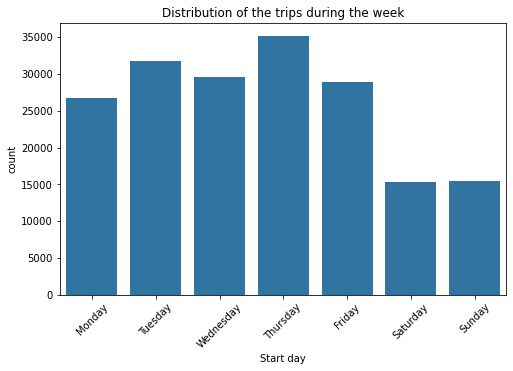

In [34]:
plt.figure(figsize=[8, 5])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'start_day', color = base_color, order = weekdays)
plt.xticks(rotation = 45)
plt.xlabel('Start day')
plt.title('Distribution of the trips during the week');

- Conclusion from the previous chart:
    
    1- Use of bikeshare decreases on the weekend (Saturday and Sunday).
    
    2- The highest usage of bikeshare is on Thursday.
    


## What is the distribution of the trips during the day?

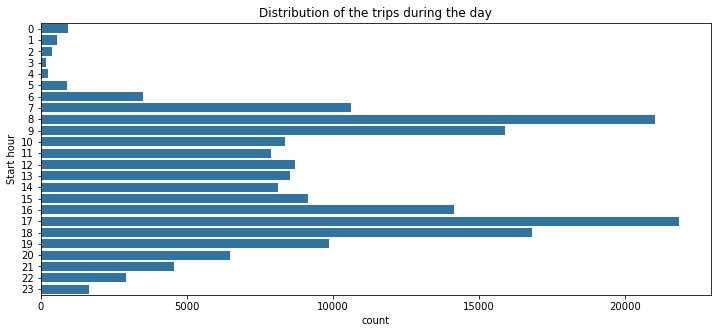

In [35]:
plt.figure(figsize=[12, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y = 'start_time_hour', color = base_color)
plt.ylabel('Start hour')
plt.title('Distribution of the trips during the day');

- The conclusion from the previous chart:

The highest use is on 17 PM and 8 AM.

The use of bike-share decrease from midnight from 12 AM to 5 AM. It slightly increases at 6 AM, but 7 AM shows a relatively high use.

In general, the use of bike-share is high in the middle of the day between 7 Am and 18 PM and it starts to decrease after 18 PM.

## What is the major user type?

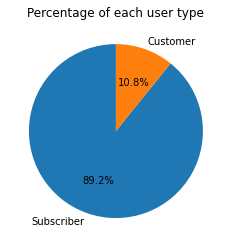

In [36]:
user_type = df_clean['user_type'].value_counts()
plt.pie(user_type, labels = user_type.index, startangle = 90, counterclock = True, autopct='%.1f%%', radius=1)
plt.title('Percentage of each user type');

- The conclusion from the previous chart:
    
Most of the users are subscribers

## Do the users use the bike share for all the trips?

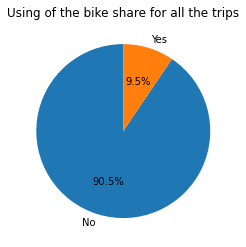

In [37]:
bike_share = df['bike_share_for_all_trip'].value_counts()
plt.pie(bike_share, labels = bike_share.index, startangle = 90, counterclock = True, autopct='%.1f%%');
plt.title('Using of the bike share for all the trips');

- The conclusion from the previous chart:

    Most of the members don't use bike share for all trips

## What is the major user gender?

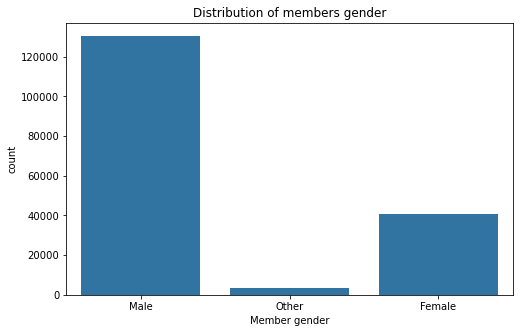

In [38]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'member_gender', color = base_color);
plt.xlabel('Member gender')
plt.title('Distribution of members gender');

- The conclusion from the previous chart:

Most of the users are males

## what is the distribution of members age across the data?

In [39]:
df_clean.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

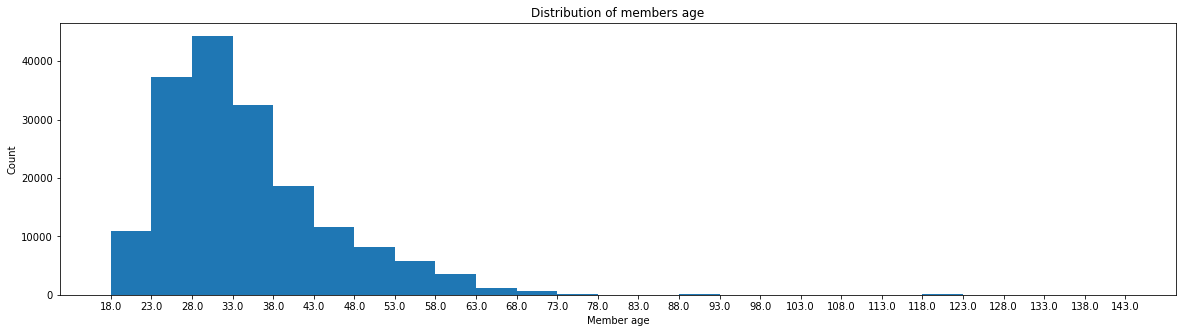

In [40]:
plt.figure(figsize=[20, 5])
bins = np.arange(18, df_clean['member_age'].max()+5, 5)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member age');
plt.ylabel('Count');
plt.title('Distribution of members age');

In [41]:
df_clean.loc[df_clean['member_age'] > 120]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_month,start_day,start_time_hour,end_time_hour,member_age
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,6436,Customer,1878.0,Female,True,24.57,February,Monday,9,9,141.0


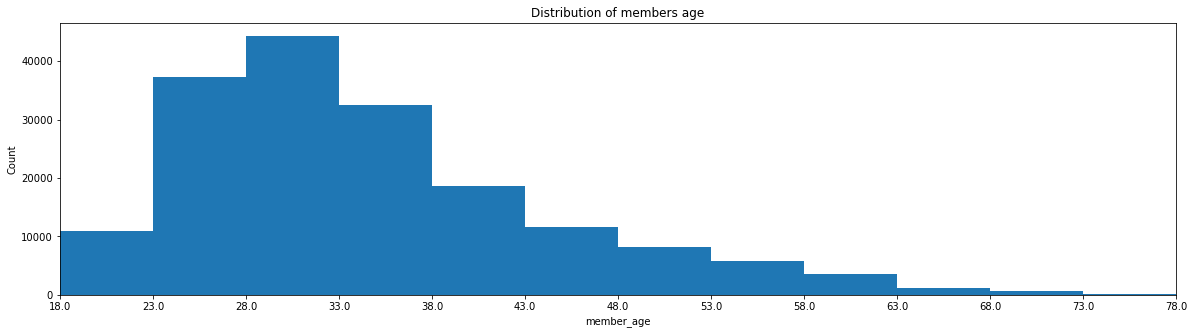

In [42]:
#The previous Graph but after limitation of x axis range
plt.figure(figsize=[20, 5])
bins = np.arange(18, df_clean['member_age'].max()+5, 5)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member age');
plt.xlim((18,78));
plt.ylabel('Count')
plt.title('Distribution of members age');

- The conclusion from the previous chart:
    
    1- The minimum age is 18 and the oldest is 141.
    
    2- There is a lot of outliers in the data related to this column, so I preferred to create another chart with a different x-axis limit
    
    3- The most common ages are between 23 to 33. The graph shows a relative decrease in the use for the members from 33 to 38, then the use start to decrease among the members older than 38.

## Trips' duration across the data

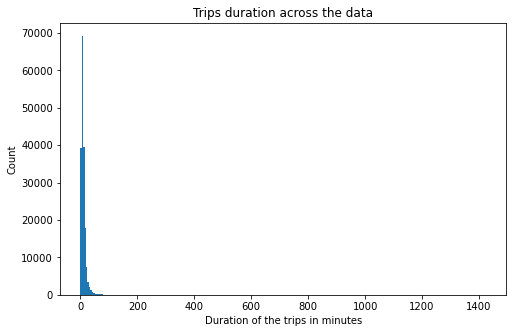

In [43]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, df_clean['duration_min'].max()+5, 5)
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title('Trips duration across the data')
plt.xlabel('Duration of the trips in minutes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [44]:
df_clean.duration_min.describe()

count    183215.000000
mean         12.098360
std          29.917982
min           1.020000
25%           5.420000
50%           8.570000
75%          13.270000
max        1424.070000
Name: duration_min, dtype: float64

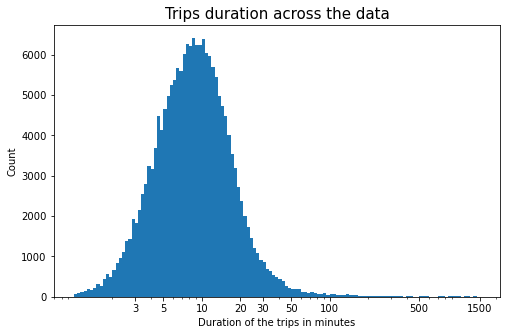

In [45]:
#let's put it on a log scale.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([3, 5, 10, 20, 30, 50, 100, 500, 1500], [3, 5, 10, 20, 30, 50, 100, 500, 1500])
plt.title('Trips duration across the data',fontsize=15)
plt.xlabel('Duration of the trips in minutes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

- The conclusion from the previous chart:
    
    The duration of the trips is, in general, small. The majority is around 10 minutes then it begins to decrease.
    
    Trips that longer than 30 minutes are not frequent.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were more trips on workdays (Monday to Friday) compared to weekends. The number of trips increases around 7-9 AM and 5-6 PM during a day. Most of the members are men. Most of the members are between 23 to 38 years old.

Most of the users are subscribers and the majority don't use bike share for all the trips.

No, I didn't need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the member_age has a lot of outliers and a very wide rand. I preferred to use xlim to decrease the x-axis limit to zoom in the age range.

The first graph for the duration of the trips was not clear, so I preferred to use a log scale to zoom in on the graph and see more details.

## Bivariate Exploration


## weekdays vs trip duration

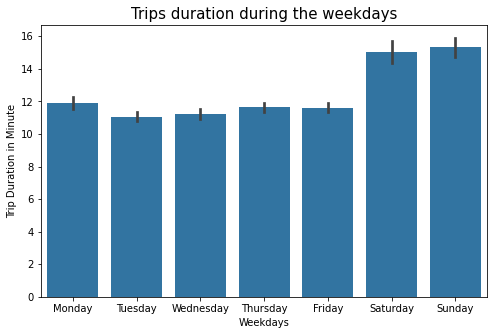

In [46]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.barplot(data=df_clean, x='start_day', y = 'duration_min', color=base_color);
plt.xlabel('Weekdays');
plt.ylabel('Trip Duration in Minute')
plt.title('Trips duration during the weekdays',fontsize=15)
plt.grid(False);

- The conclusion of the previous graph:
    
    The highest duration of the trips is on the weekend (Saturday and Sunday).
    
    On the working days, the duration of the trips is less than on the weekend and is between 10 to 12 minutes.

## weekdays vs start hour

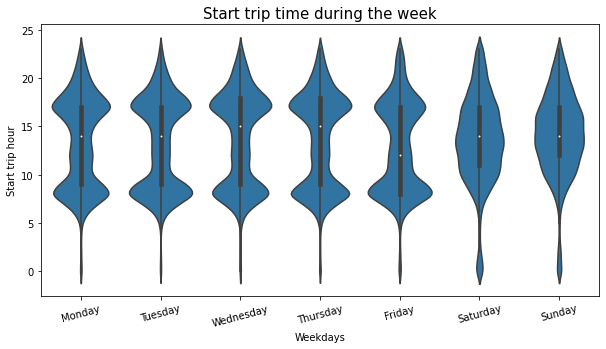

In [47]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df_clean, x='start_day', y='start_time_hour', color=base_color, innner=None)
plt.xlabel('Weekdays');
plt.ylabel('Start trip hour')
plt.title('Start trip time during the week',fontsize=15)
plt.xticks(rotation=15);


- The conclusion from the previous graph:
    
    The distribution of the start hour is almost the same during the working days. As we see, there are two peaks. One is between 7 to 9, and another one is between 17 and 18.
    
    This distribution is different from the distribution during the weekend. As we see only one peak around 13 and 15 and there is slightly higher use after midnight compared to on the working days.

## user type vs member gender

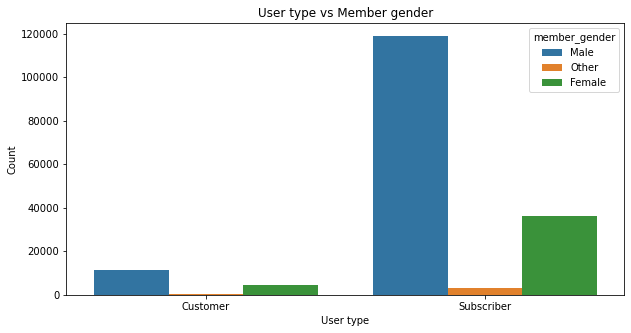

In [48]:
plt.figure(figsize=[10, 5])

sb.countplot(data=df_clean, x="user_type", hue="member_gender")
plt.xlabel('User type');
plt.ylabel('Count')
plt.title('User type vs Member gender')
plt.grid(False);

- The conclusion from the previous graph:
    
    Most of the subscribers or customers are men

## User type and member gender vs trip duration

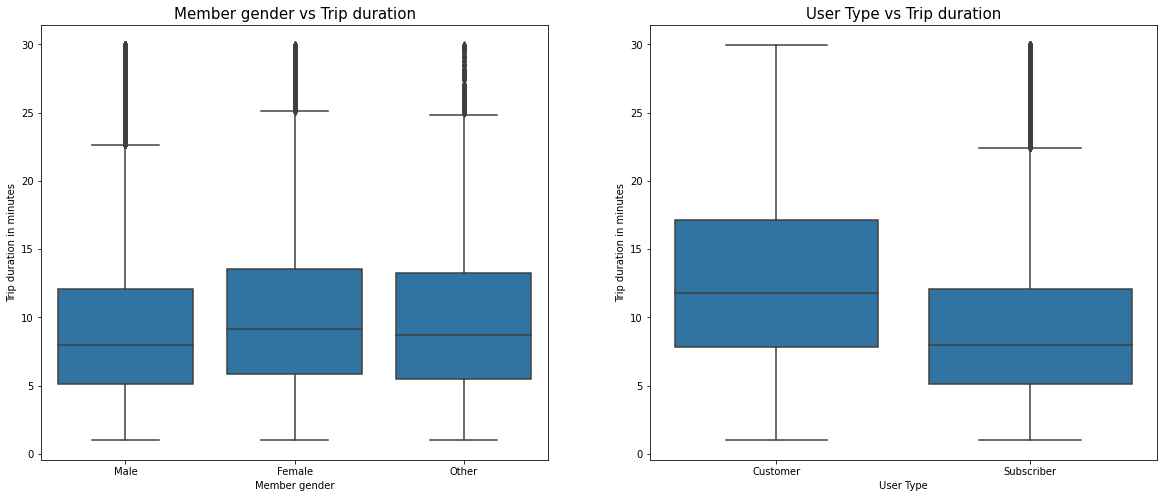

In [49]:
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

# left plot: 
plt.subplot(1, 2, 1)
sb.boxplot(data=df_clean.loc[df_clean["duration_min"] < 30], x='member_gender', y='duration_min', color = base_color)
plt.xlabel('Member gender');
plt.ylabel('Trip duration in minutes');
plt.title('Member gender vs Trip duration',fontsize=15);
plt.grid(False);

# right plot: 
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean.loc[df_clean["duration_min"] < 30], x='user_type', y='duration_min', color = base_color)
plt.xlabel('User Type');
plt.ylabel('Trip duration in minutes');
plt.title('User Type vs Trip duration',fontsize=15);
plt.grid(False);

- The conclusion from the previous graph:
    
   The box plots tell us that the Customer bike trips are longer than Subscriber bike trips. We can see that the Customer median line is above the Subscriber median line. 
We can conclude from the left graph that females' trips are longer than men's trips.

As seen in the previous graphs, most of the trips are less than 30 minutes, so it was necessary to limit the y-axis to include the trip duration shorter than 30 minutes, to get a clear graph.

## start station vs user type

In [50]:
#Top 20 start station across the data
start_station_order = df_clean.start_station_name.value_counts().nlargest(20).index
start_station_order

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Steuart St at Market St', 'The Embarcadero at Sansome St',
       'Bancroft Way at Telegraph Ave', 'Bancroft Way at College Ave',
       '2nd St at Townsend St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       'Beale St at Harrison St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Townsend St at 7th St', '4th St at Mission Bay Blvd S'],
      dtype='object')

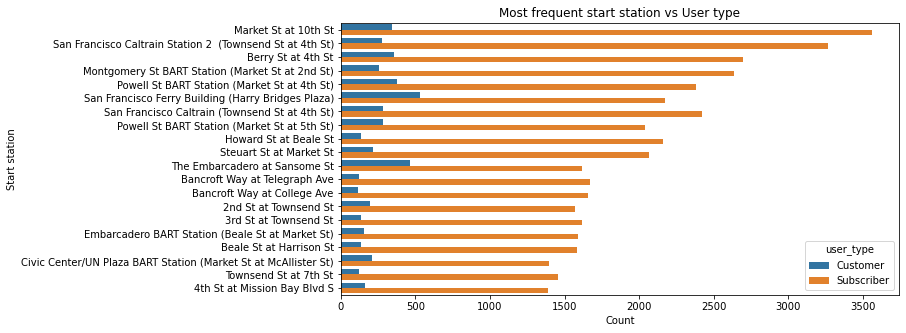

In [51]:
plt.figure(figsize = [10, 5])
sb.countplot(data=df_clean, y='start_station_name', hue="user_type", order=start_station_order)
plt.title('Most frequent start station vs User type')
plt.xlabel('Count')
plt.ylabel('Start station');

- The conclusion from the previous chart:
    
    most of the subscribers start their trips from 'Market st at 10th st' followed by 'San Francisco Caltrain Station 2' followed by 'Berry St at 4th St'
   
    Most of the customers start their trips from 'San Francisco Ferry Building (Harry Bridges Plaza)' followed by 'The Embarcadero at Sansome St'.
                

        

## End station vs user type

In [52]:
#Top 20 end station
end_station_order = df_clean.end_station_name.value_counts().nlargest(20).index
end_station_order

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St', 'Howard St at Beale St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Bancroft Way at Telegraph Ave', 'Beale St at Harrison St',
       '2nd St at Townsend St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       '4th St at Mission Bay Blvd S', 'Townsend St at 7th St',
       'The Embarcadero at Steuart St'],
      dtype='object')

Text(0, 0.5, 'end station')

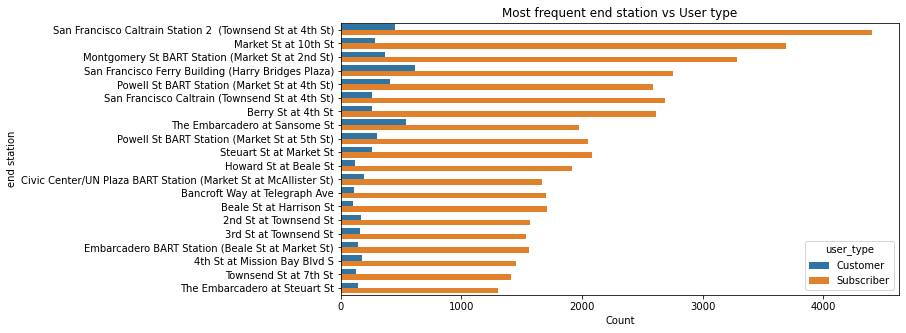

In [53]:
plt.figure(figsize = [10, 5])
sb.countplot(data=df_clean, y='end_station_name', hue="user_type", order=end_station_order);
plt.title('Most frequent end station vs User type')
plt.xlabel('Count')
plt.ylabel('end station')

- The conclusion from the previous chart:
    
    Most of the subscribers end their trips in 'San Francisco Caltrain Station 2  (Townsend St at 4th St)' followed by
       'Market St at 10th St', followed by 'Montgomery St BART Station (Market St at 2nd St)'
        
    Most of the customers end their trips in 'San Francisco Ferry Building (Harry Bridges Plaza)' followed by 'The Embarcadero at Sansome St'.                


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
    
On the weekend (Saturday and Sunday): the Trips' duration is longer than trips' duration during the working days. The most frequent start hour is between 1 and 3 PM, and we can notice some trips after midnight.

On the working days: the Trips' duration is shorter than on the weekend, and most of the trips start at rush hours.

Most of the users are subscribers, and most of them are men. The trips' duration for subscribers is shorter than the trips for customers.
Women ride longer trips than men.

Most of the subscribers start their trips from 'Market st at 10th st' and end their trips in it too.

Most of the customers start their trips from 'San Francisco Ferry Building (Harry Bridges Plaza)' and end their trips in it too.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly that the customers take longer trips than subscribers.

The member_gender type 'other' has a high trip duration compared to men and almost equal to women. 

## Multivariate Exploration


## Member gender vs user type vs the trip duration

Text(0.5, 24.0, 'User type')

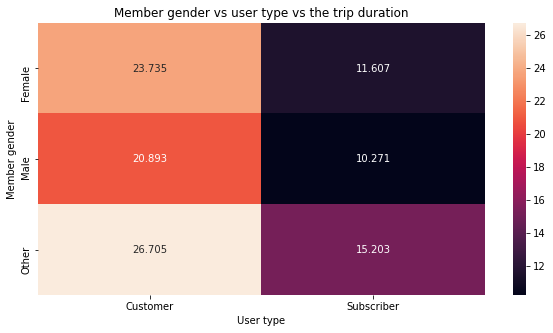

In [54]:
avg_trip_duration = df_clean.groupby(['member_gender', 'user_type']).mean()['duration_min']
avg_trip_duration = avg_trip_duration.reset_index()
avg_trip_duration = avg_trip_duration.pivot(index = 'member_gender', columns = 'user_type', values = 'duration_min' )
plt.figure(figsize = [10, 5])
sb.heatmap(avg_trip_duration, annot = True, fmt = '.3f')
plt.title('Member gender vs user type vs the trip duration')
plt.ylabel('Member gender')
plt.xlabel('User type')

- The conclusion of the previous graph:
    
    The previous graph confirmed our last findings related to gender, user type, and trip duration.
    
    The trips' duration for both Male and female subscribers is almost the same. 
    
    In general, the trips' duration is longer for user type 'customer' especially the women.
    
    The average trip duration for other is higher than those for women and men regardless of the user type. 

## Start day vs Start station id vs Member gender

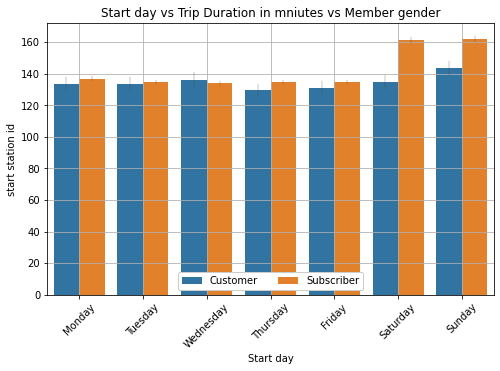

In [55]:
plt.figure(figsize = [8, 5])
ax = sb.barplot(data = df_clean, x = 'start_day', y = 'start_station_id', hue = 'user_type', errwidth= 0.3)
ax.legend(loc = 8, ncol = 3, framealpha = 1)
plt.title('Start day vs Trip Duration in mniutes vs Member gender')
plt.ylabel('start station id')
plt.xlabel('Start day')
plt.xticks(rotation = 45)
plt.grid(True);

I preferred to plot the same data by another plotting type to zoom in the y axis and get more accurate information

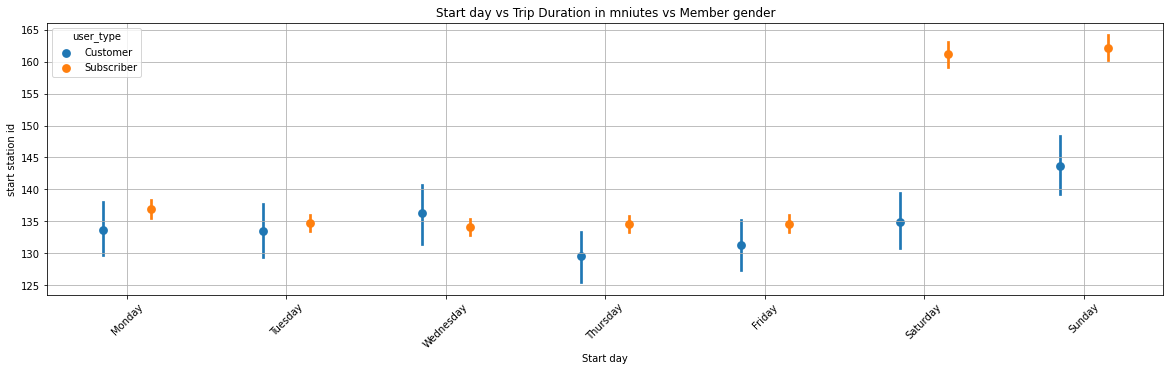

In [56]:
plt.figure(figsize = [20, 5])
ax = sb.pointplot(data = df_clean, x = 'start_day', y = 'start_station_id', hue = 'user_type',
                  dodge = 0.3, linestyles = "")
plt.title('Start day vs Trip Duration in mniutes vs Member gender')
plt.ylabel('start station id')
plt.xlabel('Start day')
plt.xticks(rotation = 45)
#ax.set(ylim=(135, 140));
plt.grid(True);

- The conclusion from the previous two graphs:
    
The most frequent start station id across the week
    
- 1- Subscribers:   
    
Monday >> start station id '137'

Tuesday >> start station id '134'

Wednesday >> start station id '133'

Thursday >> start station id '134'

Friday >> start station id '134'

Saturday >> start station id '162'

Sunday >> start station id '163'
    
- 2- Customers
     
Monday >> start station id '134'

Tuesday >> start station id '133'

Wednesday >> start station id '136'

Thursday >> start station id '129'

Friday >> start station id '131'

Saturday >> start station id '134'

Sunday >> start station id '144'

## Start day vs Trip duration in minutes vs Member gender

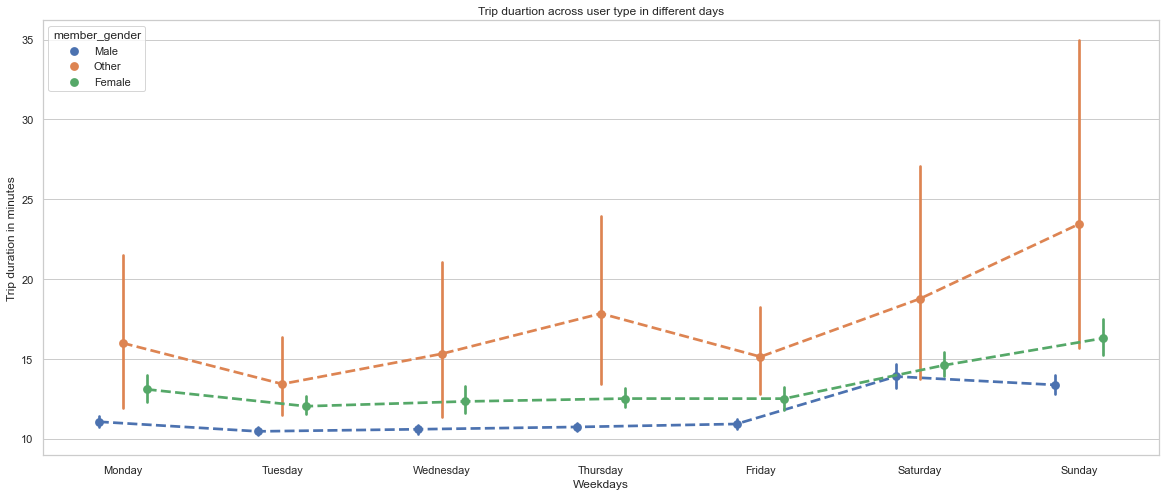

In [57]:
fig = plt.figure(figsize = [20,8])
sb.set_theme(style='whitegrid')
sb.pointplot(data = df_clean, x = 'start_day', y = 'duration_min', hue = 'member_gender', dodge = 0.3, linestyles = "--")
plt.title('Trip duartion across user type in different days')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Weekdays')
plt.show();

- The conclusion from the previous plot:
    
Males and Females: The Trips duration are almost constant during the working days and increase during the weekend. 

Males ride slightly longer trips on Saturday, but females ride slightly longer trips on Sunday.
    
Other: graph show unconstant trip duration across the weekday.
They ride shorter trips on Tuesday and Friday, and slightly longer trips on Monday and Wednesday. They ride the longest trips are on Sunday followed by Saturday.
    
The previous chart confirms our findings that, in general, females ride longer trips than males, and trip duration for member gender other is the longest.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The average trip duration for both Male and female subscribers is almost the same. The trip duration increases on the weekend.

customers ride longer rides especially the women.

Start station id '134' in is the most frequent start station for both subscribers and customers.

### Were there any interesting or surprising interactions between features?

The average trip duration for other is higher than those for women and men regardless of the user type.

Station id '134' is very frequent for subscribers during the working days.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!